<h1 style='text-align:center'> Capstone Project - The Comparison of Neighborhoods </h1>   
<h3 style='text-align:center'> Dharmesh Patel, 04 July 2020 </h3>
<hr>

## Table of contents
1. [Introduction: Business Problem](#introduction)
2. [Data Source](#data)    
    [Neighborhood data collection](#data)    
    [Venue data collection using Foursquare API](#data2)    
    [Data wrangling and standardization](#data3)    
3. [Methodology](#methodology)   
4. [Analysis](#analysis)      
    [City level analysis](#analysis)      
    [Neighborhood level analysis](#cluster)     
5. [Results and Discussion](#results) 
6. [Conclusion](#conclusion) 

<hr>

<a name="introduction"></a>
<h2 style='text-align:left'> 1. Introduction: </h2>

### 1.1 Background    

*__Is New York City more like Toronto?__*

*Whenever a person relocates to new city, they search for a suitable neighborhood. They are usually interested in knowing the different neighborhoods that the city has to offer, and find out the neighborhoods with specific venue or business of their interest, and compare the options. Combining the location and the information of venues near to neighborhood would help new people/business in a city to make better informed decisions and help them to choose neighborhood amongst the many neighborhood in the city.*

*__Objective:__ Primary objective of this project is to set up the process to compare neighborhood across geographical location, and provide results that help us to analyze how the selected cities and its neighborhoods compares to each other, Cities in terms of the likelihood of their neighborhoods and neighborhoods by kind of venues they offer, such as:*
* Compare the cities in terms of the number of restaurants serving their favorite cuisine
* Compare neighborhoods which has venues of their choice like Gym, Park, Restaurant, Market etc.   

### 1.2	Interested audience

*Specifically, this project will be targeted to people/business new to the selected city and interested in finding out the neighborhoods with specific venue or venues, and compare it with the other neighborhoods. It will also help analyze the businesses within city.* 

*__Scope:__
Anyone who wants to know more about Toronto, Canada and New York city of America, and find out neighborhood having at least one top venue in following category: Gym, Park, Arts & Entertainment, Beach, Coffee Shop, Sports Bar, Market, Supermarket, Asian Restaurant, Indian Restaurant.*

<a name="data"></a> 
<h2 style='text-align:left'> 2. Data: </h2>

*Both the selected cities are very diverse and are the financial capitals of their respective countries, in order to compare neighborhoods and Venues across both these cities, I started with compiling address and location (longitude, latitude) data for each neighborhood of both cities.*   

### 2.1  Neighborhood Data

*New York has 5 boroughs and 306 neighborhoods. I have obtained this dataset which exists for free on the web, and contains the latitude and longitude coordinates of each neighborhood: <a href = https://geo.nyu.edu/catalog/nyu_2451_34572> New York neighborhood data source </a>*

*The Toronto city has 10 boroughs and 99 neighborhoods. I have compiled this data set by scraping the Toronto postcode  from wikipedia webpage for neighborhood address and then geocode address using Python Geocoder to obtain coordinates of each neighborhood: <a href = https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M> Toronto neighborhood location </a>*

In [1]:
## Import required libraries
import pandas as pd # library for data analsysis
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import numpy as np # library to handle data in a vectorized manner
#print("Libraries Imported!")

## Let's download the data and save it as a CSV
!wget -q -O 'Toronto_df.csv' 'https://raw.githubusercontent.com/Dharmeshpatel25Sep/Coursera-Capstone/51fecc481bef45f3cf6b192edaed50f6fcbdf64f/Toronto_df.csv'
!wget -q -O 'Newyork_df.csv' 'https://raw.githubusercontent.com/Dharmeshpatel25Sep/Coursera-Capstone/51fecc481bef45f3cf6b192edaed50f6fcbdf64f/Newyork_df.csv'

## Now that the data for both city is downloaded, let's read it into a pandas dataframe.
Toronto_df = pd.read_csv("Toronto_df.csv")
Newyork_df = pd.read_csv("Newyork_df.csv")

## Clean dataframe
Toronto_df = Toronto_df.drop('PostalCode',axis=1)

## Drop duplicate Neighborhood if any
Newyork_df.drop_duplicates(subset = 'Neighborhood', keep = 'first', inplace = True)
Toronto_df.drop_duplicates(subset = 'Neighborhood', keep = 'first', inplace = True)
# print(Newyork_df[Newyork_df.duplicated('Neighborhood',keep=False)])
# print(Toronto_df[Toronto_df.duplicated('Neighborhood',keep=False)])

Toronto_df.insert(0,'City','Toronto')
Newyork_df.insert(0,'City','New York')

# ## Print 
# print("\nToronto_df:\n",Toronto_df.head(3),"\n\nNewyork_df:\n",Newyork_df.head(3))
# print("\n# Total Neighborhoods:",Toronto_df.shape[0]+Newyork_df.shape[0])

<li Style='font-size:110%;color:brown'> Clean neighborhood data of Toronto city </li>

In [2]:
## Set df as city dtaframe to view details
df = Toronto_df.copy() ## select the dataframe containing your Cities neigborhoods loation data
city = 'Toronto'       ## provide the name of City to use while printing details

## print the number of Boroughs and Neighborhoods within City. 
print('\nThe', city, 'city has {} boroughs and {} neighborhoods.'.format(len(df['Borough'].unique())
                                                                        ,df.shape[0]))
## Print the details
print('\n # of Neighborhoods in each Borough:\n')
print(df[['Borough','Neighborhood']].groupby(
    'Borough',as_index=False).count().sort_values(by='Neighborhood',ascending=False),'\n')

## Print dataframe
df.head(7)


The Toronto city has 10 boroughs and 99 neighborhoods.

 # of Neighborhoods in each Borough:

            Borough  Neighborhood
6        North York            20
1  Downtown Toronto            19
7       Scarborough            17
4         Etobicoke            12
0   Central Toronto             9
8      West Toronto             6
2      East Toronto             5
3         East York             5
9              York             5
5       Mississauga             1 



,City,Borough,Neighborhood,Latitude,Longitude
0,Toronto,North York,Parkwoods,43.753259,-79.329656
1,Toronto,North York,Victoria Village,43.725882,-79.315572
2,Toronto,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,Toronto,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Toronto,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,Toronto,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,Toronto,Scarborough,"Malvern, Rouge",43.806686,-79.194353


<li Style='font-size:110%;color:brown'> Clean neighborhood data of New York city </li>

In [3]:
## Set df as city dtaframe to view details
df = Newyork_df.copy() ## select the dataframe containing your Cities neigborhoods loation data
city = 'New York'       ## provide the name of City to use while printing details

## print the number of Boroughs and Neighborhoods within City. 
print('\nThe', city, 'city has {} boroughs and {} neighborhoods.'.format(len(df['Borough'].unique())
                                                                        ,df.shape[0]))
## Print the details
print('\n # of Neighborhoods in each Borough:\n')
print(df[['Borough','Neighborhood']].groupby(
    'Borough',as_index=False).count().sort_values(by='Neighborhood',ascending=False),'\n')

## Print dataframe
df.head(7)


The New York city has 5 boroughs and 302 neighborhoods.

 # of Neighborhoods in each Borough:

         Borough  Neighborhood
3         Queens            80
1       Brooklyn            70
4  Staten Island            60
0          Bronx            52
2      Manhattan            40 



,City,Borough,Neighborhood,Latitude,Longitude
0,New York,Bronx,Wakefield,40.894705,-73.847201
1,New York,Bronx,Co-op City,40.874294,-73.829939
2,New York,Bronx,Eastchester,40.887556,-73.827806
3,New York,Bronx,Fieldston,40.895437,-73.905643
4,New York,Bronx,Riverdale,40.890834,-73.912585
5,New York,Bronx,Kingsbridge,40.881687,-73.902818
6,New York,Manhattan,Marble Hill,40.876551,-73.910660


<li Style='font-size:110%;color:brown'> Appended data of both the cities, in order to fetch venue details for each neighborhood at once from Foursquare's API </li>

In [4]:
## Checking the Columns before appending tabels to append data properly  
#Toronto_df.columns, Newyork_df.columns

## Appending tabels
Nghbr_df = pd.concat([Newyork_df, Toronto_df], ignore_index=False).reset_index(drop=True)
Nghbr_df.to_csv('Nghbr_df.csv', index=False)

## print the number of Boroughs and Neighborhoods within City. 
print('\nThe data includes {} cities {} boroughs and {} neighborhoods.'.format(len(Nghbr_df['City'].unique()),
                                                                               len(Nghbr_df['Borough'].unique()),
                                                                               Nghbr_df.shape[0]))
## Print the details
print('\n # of Neighborhoods in each Borough:\n')
print(Nghbr_df[['City','Borough','Neighborhood']].groupby(
    ['City','Borough'],as_index=False).count().sort_values(by='Neighborhood',ascending=False),'\n')



The data includes 2 cities 15 boroughs and 401 neighborhoods.

 # of Neighborhoods in each Borough:

        City           Borough  Neighborhood
3   New York            Queens            80
1   New York          Brooklyn            70
4   New York     Staten Island            60
0   New York             Bronx            52
2   New York         Manhattan            40
11   Toronto        North York            20
6    Toronto  Downtown Toronto            19
12   Toronto       Scarborough            17
9    Toronto         Etobicoke            12
5    Toronto   Central Toronto             9
13   Toronto      West Toronto             6
7    Toronto      East Toronto             5
8    Toronto         East York             5
14   Toronto              York             5
10   Toronto       Mississauga             1 



<a name="data2"></a>      

### 2.2  Foursquare API Data

* *From Foursquare’s explore API, I fetched all venues (up to 100) within 500 meter radius of neighborhood's geographical location and collected their names, categories and locations (latitude and longitude).  I will be using this data to analyze neighborhoods having similar kind of venues and explore similar venues with in city.*

* *From Foursquare's categories API, I retrieved mapping data for mapping venue to general category such as spot for Food, Entertainment etc.*
    - Foursquare’s explore API    : https://api.foursquare.com/v2/venues/explore?   
    - Foursquare's categories API : https://api.foursquare.com/v2/venues/categories?    

*Note: Dataset retrieved from API is imported to CSV files, which are available at my Git hub repositiry: <a href = https://github.com/Dharmeshpatel25Sep/Coursera-Capstone> github </a>*

In [5]:
## Imrorting Libraries  
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

## Matplotlib and associated plotting modules

## use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

## import k-means for clustering 
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
#!pip install folium==0.5.0
import folium # map rendering library

#print('Libraries imported.')

# @hidden_cell
CLIENT_ID = '0XUWQYJ51LOM4MNDEUUOJ1XPHCV13TQ4PIUE4SW1MADEN2U2' # your Foursquare ID
CLIENT_SECRET = 'F5ZG3S4U0DVS2D0OI1YDYWYM54FBO4X4VXSAXALU2I4KSS0M' # your Foursquare Secret
VERSION = '20200618'

## Define LIMIT query and radius 
radius = 500; LIMIT = 100

# ## Define the corresponding URL
# url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
#     CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



<li Style='font-size:110%;color:brown'> Venue data for each neighborhood of both cities. </li>

In [6]:
## Take a look to dataframe 
!wget -q -O 'Venues_df.csv' 'https://raw.githubusercontent.com/Dharmeshpatel25Sep/Coursera-Capstone/master/Venues_df.csv'
Venues_df = pd.read_csv("Venues_df.csv")
Venues_df.head(15)

,City,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Categoryid
0,New York,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop,4bf58dd8d48988d1d0941735
1,New York,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy,4bf58dd8d48988d10f951735
2,New York,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop,4bf58dd8d48988d1c9941735
3,New York,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy,4bf58dd8d48988d10f951735
4,New York,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop,4bf58dd8d48988d148941735
5,New York,Wakefield,40.894705,-73.847201,Shell,40.894187,-73.845862,Gas Station,4bf58dd8d48988d113951735
6,New York,Wakefield,40.894705,-73.847201,Subway,40.890468,-73.849152,Sandwich Place,4bf58dd8d48988d1c5941735
7,New York,Wakefield,40.894705,-73.847201,Central Deli,40.896728,-73.844387,Deli / Bodega,4bf58dd8d48988d146941735
8,New York,Wakefield,40.894705,-73.847201,Koss Quick Wash,40.891281,-73.849904,Laundromat,52f2ab2ebcbc57f1066b8b33
9,New York,Co-op City,40.874294,-73.829939,NaN,NaN,NaN,NaN,NaN


*Next, I created table for __mapping venue category__ to generalize category such as spot for Food , Entertainment, Nightlife etc.*

In [7]:
# @hidden_cell
url1 = 'https://api.foursquare.com/v2/venues/categories?client_id=0XUWQYJ51LOM4MNDEUUOJ1XPHCV13TQ4PIUE4SW1MADEN2U2&client_secret=F5ZG3S4U0DVS2D0OI1YDYWYM54FBO4X4VXSAXALU2I4KSS0M&v=20200618'
mapcategories = requests.get(url1).json()

## fetch Categories object from Jason file fetched from Foursqure response (mapcategories)
Categories_Map = mapcategories['response']['categories']

## Create Table for Categories and sub Categories assosiated to it
Categories_df = pd.json_normalize(Categories_Map) # flatten JSON

def mapcategories(id, names, categories):
    cat_list=[]
    for id, name, categories in zip(id, names, categories):
        #print(name)            
        try:
            # return only relevant categories for each Category
            cat_list.append([(id, name, c['name'], c['id']) for c in categories])
            #else:
        except:
            cat_list.append([(id, name, categories, None, None)])
    #return cat_list
    Categoriesmap_df = pd.DataFrame([item for cat_list in cat_list for item in cat_list])
    Categoriesmap_df.columns = ['Categoryid_id','Category','Fine Category','Fine_Catid']
    
    #Categoriesmap_df.to_csv('Categoriesmap_df.csv', index=False)
    
    #print('New dataframe for sub categories is created.')
    return(Categoriesmap_df)

## Creatin dataframe using mapcategories function 
Categoriesmap_df = mapcategories(id = Categories_df['id'], names=Categories_df['name']
                                 , categories=Categories_df['categories'])

## Save the Categoriesma df to CSV File
Categoriesmap_df.to_csv('Categoriesmap_df.csv', index=False) ## Saving the Final Dataframe as CSV

Categoriesmap_df[20::20].head(5)

,Categoryid_id,Category,Fine Category,Fine_Catid
20,4d4b7104d754a06370d81259,Arts & Entertainment,Museum,4bf58dd8d48988d181941735
40,4d4b7105d754a06372d81259,College & University,College Cafeteria,4bf58dd8d48988d1a1941735
60,4d4b7105d754a06373d81259,Event,Conference,5267e4d9e4b0ec79466e48c6
80,4d4b7105d754a06374d81259,Food,Bangladeshi Restaurant,5e179ee74ae8e90006e9a746
100,4d4b7105d754a06374d81259,Food,Dumpling Restaurant,4bf58dd8d48988d108941735


<a name='data3'></a>

### 2.3 Data Wrangling:

*Now, We have comprehensive data set for neighborhoods of both the cities along with venues category. so I decided to explore the data and check that we have required data for analysis and standardize it for further analysis.* 

* Checked data for duplicates, missing or miscellaneous values and cleaned it
* Created dataframe for unique venues with in city
* Created dataframe to overview the top 10 venue categories for each neighborhood

In [8]:
## Now that the data for neighborhoods of both city is downloaded, let's read it into a pandas dataframe.
Venues_df = pd.read_csv("Venues_df.csv"); Nghbr_df = pd.read_csv("Nghbr_df.csv")

Venues_df = Venues_df.join(Nghbr_df[['Neighborhood','Borough']].set_index('Neighborhood'),on='Neighborhood')
Venues_df = Venues_df.reindex(['City','Borough','Neighborhood', 'Neighborhood Latitude','Neighborhood Longitude', 
                  'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category', 'Venue Categoryid'], axis=1)
#print(Venues_df.shape[0])

<li Style='font-size:110%;color:brown'> Removed neighborhoods which has no venue available nearby.</li>

In [9]:
Venues_df[Venues_df['Venue'].isnull()==True]

,City,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Categoryid
9,New York,Bronx,Co-op City,40.874294,-73.829939,NaN,NaN,NaN,NaN,NaN
11703,Toronto,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,NaN,NaN,NaN,NaN,NaN


<li Style='font-size:110%;color:brown'> Replaced miscellaneous value found for venue category like neighborhood shown below. </li>

In [10]:
## Replace/drop Miscellaneous value such as 'Venue Category' is neighborhood
subup = Venues_df[(Venues_df['Venue Category']=='Neighborhood') & (Venues_df['Venue'].str.contains('Beach'))].index
Venues_df.loc[subup,:]

,City,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Categoryid
1352,New York,Brooklyn,Brighton Beach,40.576825,-73.965094,Brighton Beach,40.575518,-73.962372,Neighborhood,4f2a25ac4b909258e854f55f
2488,New York,Brooklyn,Gerritsen Beach,40.590848,-73.930102,Gerritsen Beach,40.592377,-73.925009,Neighborhood,4f2a25ac4b909258e854f55f
9947,New York,Queens,Hammels,40.587338,-73.805530,"Rockaway Beach, NY",40.585899,-73.809066,Neighborhood,4f2a25ac4b909258e854f55f
10313,Toronto,East Toronto,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood,4f2a25ac4b909258e854f55f


<li Style='font-size:110%;color:brown'> View clean neighborhood data with venues detail </li>

In [11]:
## Check and Drop Duplicate entries if any within neigborhood
col = Venues_df.columns # col = ['City', 'Neighborhood', 'Neighborhood Latitude','Neighborhood Longitude', 'Venue','Venue Latitude', 'Venue Longitude', 'Venue Category']

## Find & Remove Duplicates entries if any 
Venues_df[Venues_df.duplicated(col,keep=False)].loc[:,] #.sort_values(by=['City','Borough'],ascending=False)
Venues_df.drop_duplicates(subset = col, keep = 'first', inplace = True)

## Find & Remove missing null venue entries if any of neighborhood
Venues_df.dropna(subset=['Venue'], axis=0, inplace=True)

## Replace/drop Miscellaneous value such as 'Venue Category' is neighborhood
subup = Venues_df[(Venues_df['Venue Category']=='Neighborhood') & (Venues_df['Venue'].str.contains('Beach'))].index
Venues_df.loc[subup,'Venue Category'] = 'Beach'

subdl = Venues_df[(Venues_df['Venue Category']=='Neighborhood') & (~Venues_df['Venue'].str.contains('Beach'))].index
Venues_df.drop(subdl, axis=0, inplace = True)

## Reset index
Venues_df = Venues_df.reset_index(drop=True)
#print(Venues_df.shape[0])
Venues_df.head()

,City,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Categoryid
0,New York,Bronx,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop,4bf58dd8d48988d1d0941735
1,New York,Bronx,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy,4bf58dd8d48988d10f951735
2,New York,Bronx,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop,4bf58dd8d48988d1c9941735
3,New York,Bronx,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy,4bf58dd8d48988d10f951735
4,New York,Bronx,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop,4bf58dd8d48988d148941735


<li Style='font-size:110%;color:brown'> Dataframe for unique venues with in City </li>

*In order to compare and see how the categories of venues are distributed in both the cities, I created new DataFrame having distinct list of all venues within city, as the venues data for each neighborhood will have duplicates entries for venue that falls in range of 500 meter of nearby or adjacent neighborhoods.*

In [12]:
## Copy the City and venues info in to new Dataframe
city_Venues_df = Venues_df.copy()[['City', 'Venue','Venue Latitude', 'Venue Longitude', 'Venue Category','Venue Categoryid']]
city_Venues_df.head()

# ## Check and Drop Duplicate entries if any within neigborhood
col = city_Venues_df.columns

## Find Duplicate entries
print('No of duplicates removed', city_Venues_df[city_Venues_df.duplicated(col,keep='first')].loc[:,]
      .sort_values(by=['Venue'],ascending=False)['Venue'].count(),'\n')

city_Venues_df.drop_duplicates(subset = col, keep = 'first', inplace = True)

print('Data of both city has total {} unique venues.\n\nUnique venues data for city:'.format(city_Venues_df.shape[0]))
city_Venues_df[8000::500].head(6)

## Remove Duplicates if any
##city_Venues_df.drop_duplicates(subset = col, keep = 'first', inplace = True)
#city_Venues_df[city_Venues_df.duplicated(col,keep=False)].loc[:,].sort_values(by=['Venue'],ascending=False)

No of duplicates removed 914 

Data of both city has total 11061 unique venues.

Unique venues data for city:


,City,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Categoryid
8378,New York,Ghost Donkey,40.725276,-73.992492,Cocktail Bar,4bf58dd8d48988d11e941735
8942,New York,Bumble & Bumble,40.759903,-73.969105,Salon / Barbershop,4bf58dd8d48988d110951735
9491,New York,Time Out Market,40.703421,-73.992146,Food Court,4bf58dd8d48988d120951735
10072,Toronto,401 Games,43.663623,-79.384037,Hobby Shop,4bf58dd8d48988d1fb941735
10641,Toronto,Papyrus,43.648195,-79.381392,Gift Shop,4bf58dd8d48988d128951735
11300,Toronto,Pho 88 Vietnamese Cuisine,43.770456,-79.413064,Vietnamese Restaurant,4bf58dd8d48988d14a941735


<li Style='font-size:110%;color:brown'> Dataframe to overview the top 10 venue categories for each neighborhood </li> 

*Next, I created new dataframe having one row for each neighborhood along with top 10 venue categories listed in columns. which I will use to classify and cluster neighborhoods., and then run our exploratory data analysis of neighborhood to determine the likelihood of neighborhoods.*

- Applied one hot encoding technique for venue category over venues dataframe 
- Grouped it by neighborhood and took the mean frequency of the category occurrence

In [13]:
## copy venues dataframe
Nghbr_Venues_df = Venues_df.copy()

## Check and Drop Duplicate venues entries if any within neigborhood
col = Nghbr_Venues_df.columns

## Check for Duplicate,missing entries, misc categories
# print('Missing:',Nghbr_Venues_df[Nghbr_Venues_df['Venue'].isnull()==True].shape[0])
# print('Duplicate:',Nghbr_Venues_df[Nghbr_Venues_df.duplicated(col,keep='first')].loc[:,].shape[0])
# print('Miscellaneous:',Nghbr_Venues_df[(Nghbr_Venues_df['Venue Category']=='Neighborhood')].shape[0])

## one hot encoding
df_dummy = pd.get_dummies(Nghbr_Venues_df[['Venue Category']], prefix="", prefix_sep="")

## Add City,neighborhood column back to dataframe
df_dummy[['City','Neighborhood','Latitude','Longitude']] = Nghbr_Venues_df[['City','Neighborhood'
                                                                            ,'Neighborhood Latitude','Neighborhood Longitude']] 

## Move City,Neighborhood column to the first column
fix_col = list(df_dummy.columns[-4:]) + list(df_dummy.columns[:-4])
Nghbr_onehot = df_dummy[fix_col]

## Take a look to dataframe
#print(Nghbr_onehot.shape,'\n')
#Nghbr_onehot.head()

## Grouping
Nghbr_grouped = Nghbr_onehot.groupby(['City','Neighborhood','Latitude','Longitude']).mean().reset_index()

## Saving the Final Dataframe as CSV
Nghbr_grouped.to_csv('Nghbr_grouped.csv', index=False) 

# print('#',Nghbr_grouped.shape[0],'Neighborhood Grouped')
# Nghbr_grouped.head()

## No of top venues to be printed 
num_top_venues = 10
## for loop to evalute and print each neighborhood
print('\nTop 10 venue categories of neighborhood:\n')
for hood in Nghbr_grouped['Neighborhood'].head(3):
    print('-----',hood,'------')
    temp = Nghbr_grouped[Nghbr_grouped['Neighborhood'] == hood].T.reset_index(); temp.columns = ['vcat','freq']
    temp = temp.iloc[4:] ; temp['freq'] = temp['freq'].astype(float) ; temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues),'\n')


Top 10 venue categories of neighborhood:

----- Allerton ------
                   vcat  freq
0           Pizza Place  0.14
1           Supermarket  0.10
2           Bus Station  0.07
3         Deli / Bodega  0.07
4        Breakfast Spot  0.03
5            Playground  0.03
6           Gas Station  0.03
7                   Spa  0.03
8                  Food  0.03
9  Fast Food Restaurant  0.03 

----- Annadale ------
             vcat  freq
0     Pizza Place  0.17
1      Sports Bar  0.08
2   Train Station  0.08
3           Diner  0.08
4   Deli / Bodega  0.08
5        Pharmacy  0.08
6  Cosmetics Shop  0.08
7            Food  0.08
8            Park  0.08
9             Pub  0.08 

----- Arden Heights ------
                    vcat  freq
0            Dry Cleaner   0.2
1               Pharmacy   0.2
2          Deli / Bodega   0.2
3            Coffee Shop   0.2
4            Pizza Place   0.2
5      Accessories Store   0.0
6  Outdoors & Recreation   0.0
7           Perfume Shop   0.0
8  Perfor

<li Style='font-size:110%;color:brown'> Neighborhood dataframe with the top 10 venue categories. </li>

In [14]:
num_topvcat = 10 # Define number of top venues categories

# Create columns according to number of top venues
columns = ['City','Neighborhood','Latitude','Longitude']
indicators = ['st', 'nd', 'rd']
for ind in np.arange(num_topvcat):
    try:
        columns.append('{}{} Most Common Vcat'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Vcat'.format(ind+1))

## Create a new dataframe
Nghbr_topvcat = pd.DataFrame(columns=columns)
Nghbr_topvcat[['City','Neighborhood','Latitude','Longitude']] = Nghbr_grouped[['City','Neighborhood'
                                                                               ,'Latitude','Longitude']]

for ind in np.arange(Nghbr_grouped.shape[0]):
    Nghbr_topvcat.iloc[ind, 4:] = Nghbr_grouped.iloc[ind, :][4:].sort_values(
                                                ascending=False).index.values[0:num_topvcat]
Nghbr_topvcat.to_csv('Nghbr_topvcat.csv',index=False)

## print dataframe
Nghbr_topvcat.head()

,City,Neighborhood,Latitude,Longitude,1st Most Common Vcat,2nd Most Common Vcat,3rd Most Common Vcat,4th Most Common Vcat,5th Most Common Vcat,6th Most Common Vcat,7th Most Common Vcat,8th Most Common Vcat,9th Most Common Vcat,10th Most Common Vcat
0,New York,Allerton,40.865788,-73.859319,Pizza Place,Supermarket,Bus Station,Deli / Bodega,Breakfast Spot,Dessert Shop,Bakery,Chinese Restaurant,Gym / Fitness Center,Gas Station
1,New York,Annadale,40.538114,-74.178549,Pizza Place,Diner,Pub,Food,Cosmetics Shop,Train Station,Park,Sports Bar,Pharmacy,Deli / Bodega
2,New York,Arden Heights,40.549286,-74.185887,Pizza Place,Deli / Bodega,Pharmacy,Coffee Shop,Dry Cleaner,Fish & Chips Shop,Financial or Legal Service,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant
3,New York,Arlington,40.635325,-74.165104,Bus Stop,Furniture / Home Store,Intersection,Grocery Store,Deli / Bodega,Boat or Ferry,Eye Doctor,Exhibit,Event Space,Event Service
4,New York,Arrochar,40.596313,-74.067124,Bus Stop,Italian Restaurant,Liquor Store,Deli / Bodega,Middle Eastern Restaurant,Supermarket,Pizza Place,Pharmacy,Bagel Shop,Mediterranean Restaurant


<a name='methodology'></a> 
<h2 style='text-align:left'> 3. Methodology: </h2>

__Data Collection:__   
*In first step, I have collected the required data for each neighborhood in both the cities: Address, location and type (category) of venues within 500 meter radius of Neighborhood location using Foursquare API.*

__Data Wrangling:__    
*Data I collected is comprehensive data set for neighborhoods of both the cities along with venues (up to 100). at this stage I explored the data & checked that I have data required for our analysis, and finally transformed it in standard format for further analysis.*

* Checked for duplicates, missing or miscellaneous values in data and cleaned it up
* Created dataframe for unique venues with in city
* Created dataframe to overview the top 10 venue categories for each neighborhood

>*Note: You may add some more neighborhood specific information in case to compare neighborhoods, such as distance of neighborhood from city center, airport, garden or from your business\home location. however, for this project we have used top 10 categories of venues that I have obtained from Foursquare API.*

*Now, I will move ahead in project and start with __Exploratory Data Analysis__.*

__City Level Analysis:__    
*I will analyse both the city according the % of venues falling in different categories. I will use the mapping table ('Categoriesmap_df') to map venue categories to general description such as Nightlife spot, Beach, Food etc. Further, I will plot the the number of restaurants serving different cuisine and types of food for both the cities and compare them.*

__Neighborhood Level Analysis:__    
*By now I will have explored New York and Toronto city, so I will start with segmentation and clustering of neighborhoods **(Data Classification: based on top 10 venue categories)** without filter of city. I will then explore few neighborhoods within city and find similar neighborhoods within\across city. and finally  I will prepare map to showcase the similar neighborhoods based on specific neighborhood.*

*As a final step, I will analyse these plots and map and try to draw conclusions on how both the cities are similar or different. I will discuss my findings and any inferences I have draw so far.*

<a name = 'analysis'></a>      
<h2 style='text-align:left'> 4. Exploratory Data Analysis: </h2>

### 4.1 City Level Analysis: 
*__Comparison of Cities based on Venue Characteristics__*

*I begin my analysis by taking a look at the count and % of venues and various categories of venues that exist in both the city.*

In [15]:
## No. of Venues in City
city_Venues_df.shape
## each Neighborhood:
print('\n# of Venues in:')
print(city_Venues_df['City'].value_counts())

city = ['New York','Toronto']
print('\nThere are {} uniques categories of venues in {},'.format
      (len(city_Venues_df[city_Venues_df['City']== city[0]]['Venue Category'].unique()),city[0]),
      'and {} in {}.'.format
      (len(city_Venues_df[city_Venues_df['City']== city[1]]['Venue Category'].unique()),city[1]))


# of Venues in:
New York    9422
Toronto     1639
Name: City, dtype: int64

There are 428 uniques categories of venues in New York, and 264 in Toronto.


*New York has way too more venues compare to Toronto, also seems there are more choices available in New York. To see how the venues categories are distributed. I mapped venue categories to more general category so I can compare it across city.*

In [16]:
## Create category mapping dataframe ##city_Venues_df.drop(['Category'],axis=1,inplace = True)
df = pd.read_csv("Categoriesmap_df.csv") # Csv was compiled @ data collection phase
     
## Add general category column to our datframe
city_Venues_df = city_Venues_df.join(df[['Category','Fine_Catid']].set_index('Fine_Catid'),
                                     on='Venue Categoryid')
# @hidden_cell
## Code to update for missing values after maping (# i.e. not in mapping table)
sub = city_Venues_df[(city_Venues_df['Category'].isnull()) & 
                      (city_Venues_df['Venue Category'].str.contains('Restaurant')|
                       city_Venues_df['Venue Category'].str.contains('Market')|
                       city_Venues_df['Venue Category'].str.contains('Taco')|
                       city_Venues_df['Venue Category'].str.contains('Noodle')|
                       city_Venues_df['Venue Category'].str.contains('Burrito')|
                       city_Venues_df['Venue Category'].str.contains('Butcher')|
                       city_Venues_df['Venue Category'].str.contains('Food'))].index
city_Venues_df.loc[sub,'Category'] = 'Food'

sub0 = city_Venues_df[(city_Venues_df['Category'].isnull()) & 
                     (city_Venues_df['Venue Category'].str.contains('Store') |
                      city_Venues_df['Venue Category'].str.contains('Grocery') |
                      city_Venues_df['Venue Category'].str.contains('Supermarket')|
                      city_Venues_df['Venue Category'].str.contains('Boutique')|
                      city_Venues_df['Venue Category'].str.contains('Shop'))].index

city_Venues_df.loc[sub0,'Category'] = 'Shop & Service'

sub1 = city_Venues_df[(city_Venues_df['Category'].isnull()) & 
                     (city_Venues_df['Venue Category'].str.contains('Gym') |
                      city_Venues_df['Venue Category'].str.contains('Yoga'))].index

city_Venues_df.loc[sub1,'Category'] = 'Gym / Fitness Center'

sub2 = city_Venues_df[(city_Venues_df['Category'].isnull()) & 
                     (city_Venues_df['Venue Category'].str.contains('Theater')|
                      city_Venues_df['Venue Category'].str.contains('Dance Studio')|
                      city_Venues_df['Venue Category'].str.contains('History Museum'))].index

city_Venues_df.loc[sub2,'Category'] = 'Arts & Entertainment'

sub3 = city_Venues_df[(city_Venues_df['Category'].isnull()) & 
                     (city_Venues_df['Venue Category'].str.contains('Court') |
                      city_Venues_df['Venue Category'].str.contains('Field') |
                      city_Venues_df['Venue Category'].str.contains('Cycle Studio')|
                      city_Venues_df['Venue Category'].str.contains('Yoga') |
                      city_Venues_df['Venue Category'].str.contains('Stadium'))].index

city_Venues_df.loc[sub3,'Category'] = 'Outdoors & Recreation'

sub4 = city_Venues_df[(city_Venues_df['Category'].isnull()) & 
                     (city_Venues_df['Venue Category'].str.contains('Bar') |
                      city_Venues_df['Venue Category'].str.contains('Pub') |
                      city_Venues_df['Venue Category'].str.contains('Beer'))].index
city_Venues_df.loc[sub4,'Category'] = 'Nightlife Spot'

subr = city_Venues_df[city_Venues_df['Category'].isnull()].index
city_Venues_df.loc[subr,'Category'] = 'Professional & Other Places'   

print('Check the last column of shown dataframe for genral category')
city_Venues_df.head()

Check the last column of shown dataframe for genral category


,City,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Categoryid,Category
0,New York,Lollipops Gelato,40.894123,-73.845892,Dessert Shop,4bf58dd8d48988d1d0941735,Food
1,New York,Walgreens,40.896528,-73.844700,Pharmacy,4bf58dd8d48988d10f951735,Shop & Service
2,New York,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop,4bf58dd8d48988d1c9941735,Shop & Service
3,New York,Rite Aid,40.896649,-73.844846,Pharmacy,4bf58dd8d48988d10f951735,Shop & Service
4,New York,Dunkin',40.890459,-73.849089,Donut Shop,4bf58dd8d48988d148941735,Food


<li Style='font-size:110%;color:brown'> 
    Category wise venues distribution across cities.</li>

In [17]:
## Group by
Citygp_df = city_Venues_df [['City','Category','Venue']]
Citygp_df = Citygp_df.groupby(['City','Category'],as_index=False).count()
   
## Pivot Count
grouped_pivot = Citygp_df.pivot(index='Category', columns='City').fillna(0)##fill na while pivot()
grouped_pivot.columns = grouped_pivot.columns.droplevel(0); grouped_pivot.columns.name = '# Venues'
 #grouped_pivot.index = grouped_pivot.index.droplevel(0)
grouped_pivot.sort_values('New York',ascending=False, axis=0, inplace=True) 

## Pivot Percentages
    #grouped_pct = grouped_pivot.apply(lambda x: x/x.sum(),axis=0).applymap(lambda x: "{:.1f}%".format(100*x))
grouped_pct = grouped_pivot.copy().apply(lambda x : 100 * x / float(x.sum()),axis=0).round(1) 
grouped_pct.columns.name = '% Venues'; grouped_pct ; grouped_pivot.head(8)

# Venues,New York,Toronto
Category,,
Food,4895.0,870.0
Shop & Service,2250.0,367.0
Nightlife Spot,587.0,105.0
Outdoors & Recreation,551.0,99.0
Travel & Transport,348.0,42.0
Gym / Fitness Center,308.0,42.0
Arts & Entertainment,255.0,53.0
Professional & Other Places,216.0,56.0


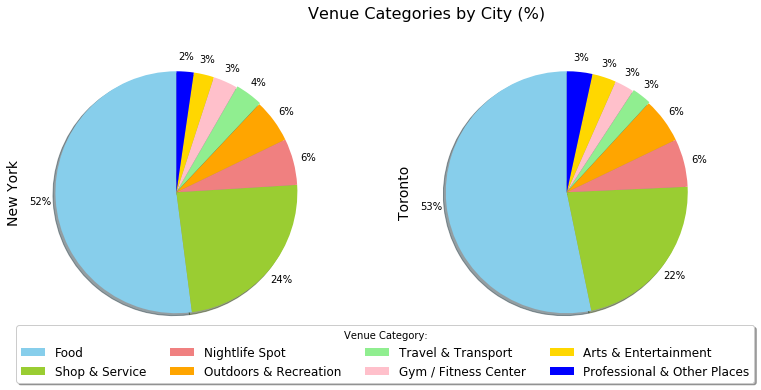

In [18]:
## Figuer 
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, subplot_kw={'aspect':'equal'})
fig.suptitle("Venue Categories by City (%)", fontsize=16)

## Incase you choose color and explode pie
explode_list = [0, 0, 0, 0, 0.01, 0, 0,0.0] # ratio for each continent with which to offset each wedge.
pcolors = ['skyblue', 'yellowgreen', 'lightcoral', 'orange', 'lightgreen','pink','gold','blue']

## Plot each pie chart in a separate subplot
    ## Sub Plot 1 for first series ax0 i.e. ax0.pie(grouped_pivot['New York']) 
grouped_pct['New York'][:-2].plot(kind='pie',figsize=(14, 6),labels=None,colors=pcolors ,autopct='%1.0f%%'
                            ,explode=explode_list,pctdistance=1.125, shadow=True, startangle=90, ax=ax0) 
    #ax0.set_title('New York',fontsize=14,y=1)
ax0.set_ylabel('New York',fontsize=14)

    ## Sub Plot 2 for Second series ax1 i.e. ax1.pie(grouped_pivot['Toronto'])
grouped_pct['Toronto'][:-2].plot(kind='pie',figsize=(14, 6),labels=None,colors=pcolors ,autopct='%1.0f%%'
                           ,explode=explode_list,pctdistance=1.125, shadow=True, startangle=90, ax=ax1)
    #ax1.set_title('Toronto',fontsize=14)
ax1.set_ylabel('Toronto',fontsize=14)

ax1.legend(labels=grouped_pct[:-2].index, loc='lower center', bbox_to_anchor=(-0.1, -0.15), ncol=4, 
           shadow=True, fancybox=True,title='Venue Category:',fontsize = 12) ## title="Legend"

fig.subplots_adjust(top=.9, left=0.09, right=.8, bottom=0.2)  # create some space below the plots by increasing the bottom-value

fig.show()

*It shows these cities are very similar and has almost identical contribution of venue categories. We can see difference of around 1-2 % for few venue categories. Although, New York has high number of venues compare to Toronto, which is expected due to different geographies and their coverage area. __The top 2 venue categories contributes to ~75% of venues, where ~52% venues falls in to Food and ~23% into Shop & Services category for both the cities.__*

<li Style='font-size:110%;color:brown'> 
    Let's see % of Restaurants serving different cuisine across cities.</li>

In [19]:
## Filter out all Restaurants and create Datframe with count using group by
subset = city_Venues_df[(city_Venues_df['Venue Category'].str.contains('Restaurant'))].index 
columns = ['City','Venue Category','Venue']
temp_df = city_Venues_df.loc[subset,:].groupby(['City','Venue Category'],as_index=False).count()[columns]
temp_df['Venue Category'] = temp_df['Venue Category'].replace(
    to_replace = r'{}($|\s)'.format(' Restaurant'), value='', regex=True)
temp_df['Venue Category'] = temp_df['Venue Category'].replace(
    to_replace = r'{}($|\s)'.format('Restaurant'), value='Local', regex=True)

## Pivot Tabel                        
Restaurant_df = temp_df.pivot(index='Venue Category',columns='City').fillna(0)
Restaurant_df.columns = Restaurant_df.columns.droplevel(0)
Restaurant_df.index.name = 'Cuisine'

# % Restaurants serving Specific Cuisine in City
Restaurant_pctdf = Restaurant_df.copy().apply(lambda x : 100 * x / float(x.sum()),axis=0).round(1) 
#print('\n % Restaurants serving specific cuisine')
Restaurant_pctdf.sort_values(by='New York', axis=0, ascending = False).head(12).T

Cuisine,Italian,Chinese,Mexican,American,Sushi,Fast Food,Japanese,Local,Thai,Latin American,Caribbean,Seafood
City,,,,,,,,,,,,
New York,12.1,8.8,7.4,6.5,4.6,4.0,3.7,3.5,3.5,3.4,3.3,3.0
Toronto,9.4,3.9,3.0,3.9,6.9,6.6,7.7,12.9,3.9,1.1,1.9,3.0


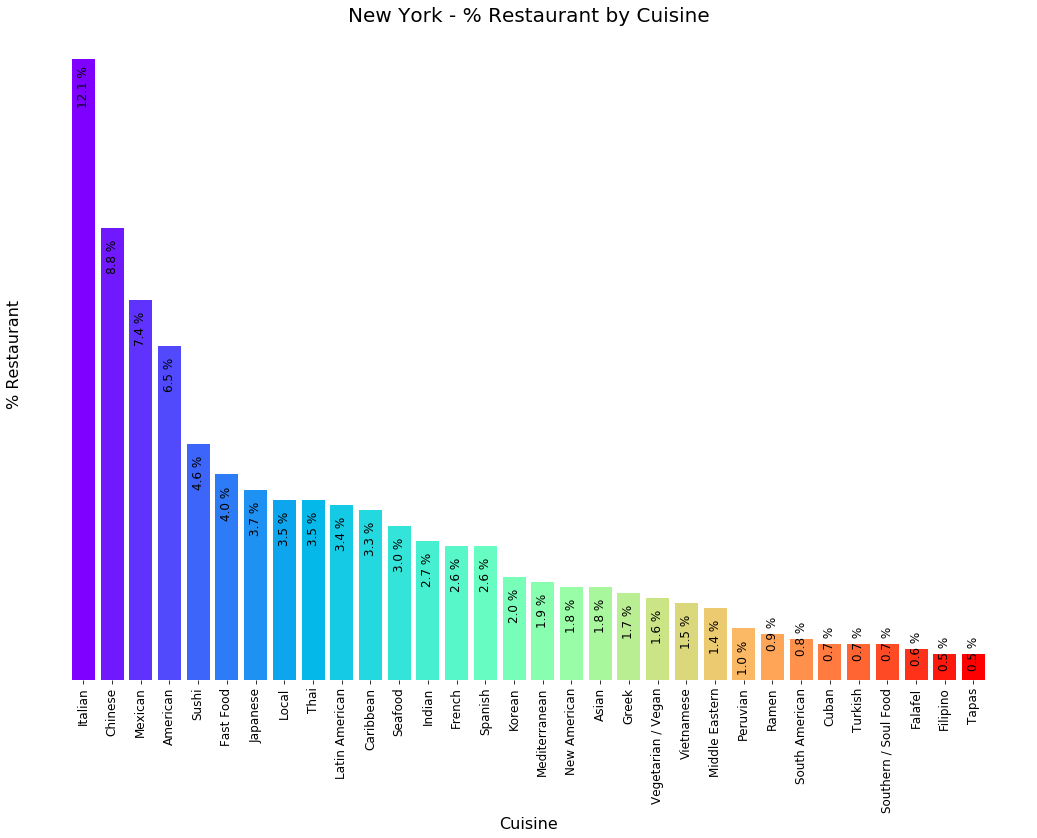

In [20]:
# New York - % Restaurant by Cuisine
subset = Restaurant_pctdf[Restaurant_pctdf['New York']>=0.5].index
venue_distribution = Restaurant_pctdf.loc[subset,:]['New York'].sort_values(ascending = False)
pcolors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (18, 12))
plt.bar(venue_distribution.index, venue_distribution.values, color = pcolors,alpha=1)
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel("Cuisine", fontsize = 16); plt.ylabel("% Restaurant", fontsize = 16)
plt.title("New York - % Restaurant by Cuisine", fontsize = 20)
for index, value in enumerate(venue_distribution): 
    val = value
    if val < 1 :
        val = -0.01
    else: val = 0.55
    plt.annotate("{:.1f} %".format(value), xy=(index,value-val)
             ,va='center',ha='center',xycoords='data',fontsize=12,color='black',rotation = 90)
plt.tick_params(left=False,labelleft=False) #remove ticks
plt.box(False)

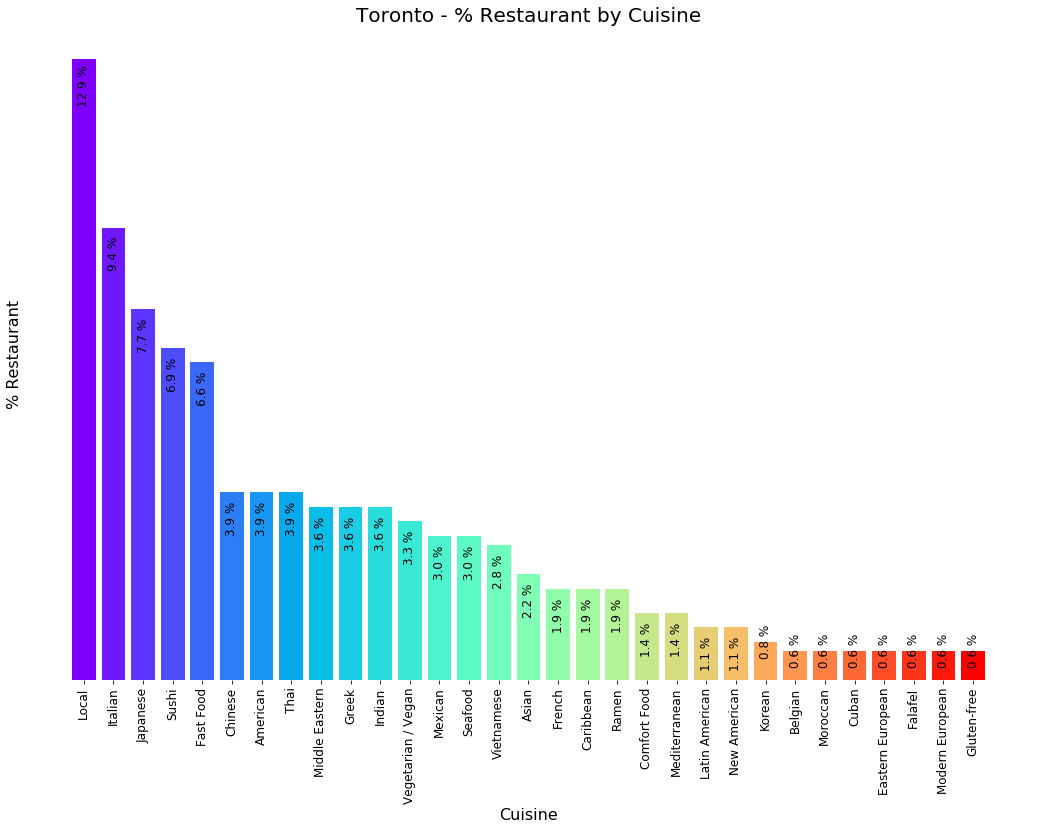

In [21]:
# Toronto - % Restaurant by Cuisine
subset = Restaurant_pctdf[Restaurant_pctdf['Toronto']>=0.5].index
venue_distribution = Restaurant_pctdf.loc[subset,:]['Toronto'].sort_values(ascending = False)
pcolors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (18, 12))
plt.bar(venue_distribution.index, venue_distribution.values, color = pcolors,alpha=1)
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel("Cuisine", fontsize = 16); plt.ylabel("% Restaurant", fontsize = 16)
plt.title("Toronto - % Restaurant by Cuisine", fontsize = 20)
for index, value in enumerate(venue_distribution): 
    val = value
    if val < 1 :
        val = -0.01
    else: val = 0.55
    plt.annotate("{:.1f} %".format(value), xy=(index,value-val)
             ,va='center',ha='center',xycoords='data',fontsize=12,color='black',rotation = 90)
plt.tick_params(left=False,labelleft=False) #remove ticks
plt.box(False)

*Looking at distribution of restaurants by cuisine they serve, we can conclude that both cities have restaurants serving cuisines famous across the globe. Note, In similar way we can compare cities according venues categories and check availability of venues.*    

*Next, let's visualise the venues serving **India Cuisine** on Map for both the cities.*

**Map of Toronto venues having Indian Restaurant.**

In [22]:
## Filter out all Restaurants and create Datframe 
subset = city_Venues_df[(city_Venues_df['Venue Category'].str.contains('Indian Restaurant') &
                        (city_Venues_df['City']=='Toronto'))].index 
columns = ['City','Venue','Venue Latitude','Venue Longitude','Venue Category']
df = city_Venues_df.loc[subset,:][columns]

## Get Coordinates of Toranto city 
address = 'Toronto City, Canada'
geolocator = Nominatim(user_agent="Venue_explorer")
location = geolocator.geocode(address); latitude = location.latitude; longitude = location.longitude

## Create Map 
# let's start with a clean copy of the map of New York
df_map = folium.Map(location = [latitude,longitude], zoom_start = 11)

# loop to add each data point to the mark cluster
for lat, lng, venue, in zip(df['Venue Latitude'], df['Venue Longitude'], df['Venue']):
    folium.features.CircleMarker(
        location=[lat, lng],
        radius=5, # define the circle markers size
        color='Yellow',
        fill=True,
        #popup= folium.Popup('{}'.format(venue), parse_html = True),
        fill_color='blue',
        fill_opacity=0.7,
        parse_html = False).add_to(df_map)
# add pop-up text to each marker on the map
for lat, lng, venue, in zip(df['Venue Latitude'], df['Venue Longitude'], df['Venue']):
    label = folium.Popup(venue, parse_html = True)
    folium.Marker([lat, lng], popup=label).add_to(df_map)
#print('Indian Restaurants in Toronto City')
df_map.save("Indian Restaurants in Toronto.html")
df_map # display map


**Map of New York venues having Indian Restaurant.**

In [23]:
## Filter out all Restaurants and create Datframe 
subset = city_Venues_df[(city_Venues_df['Venue Category'].str.contains('Indian Restaurant') &
                        (city_Venues_df['City']=='New York'))].index 
columns = ['City','Venue','Venue Latitude','Venue Longitude','Venue Category']
df = city_Venues_df.loc[subset,:][columns]

## Get Coordinates of Toranto city 
address = 'New York City, NY'
geolocator = Nominatim(user_agent="Venue_explorer")
location = geolocator.geocode(address); latitude = location.latitude; longitude = location.longitude

## Create Map 
# let's start with a clean copy of the map of New York
df_map = folium.Map(location = [latitude,longitude], zoom_start = 11)

# loop to add each data point to the mark cluster
for lat, lng, venue, in zip(df['Venue Latitude'], df['Venue Longitude'], df['Venue']):
    folium.features.CircleMarker(
        location=[lat, lng],
        radius=5, # define the circle markers size
        color='Yellow',
        fill=True,
        popup= folium.Popup('{}'.format(venue), parse_html = True),
        fill_color='blue',
        fill_opacity=0.7,
        parse_html = False).add_to(df_map)
#print('Indian Restaurants in New York City\n')
df_map.save("Indian Restaurants in New York.html")
df_map # display map

*We can see that both the city has Indian restaurants which is spread across city and New York has much more number of Indian restaurants than Toronto. Now, I will move further to the next analysis of neighborhoods.*

<a name = 'cluster'> </a>

### 4.2 Neighborhood Level Analysis:
*__Comparison of Neighborhood based on top 10 Venue Categories__*

*I have taken a subset of neighborhoods for analysis as defined in scope. i.e. neighborhood which has some venues of our choice nearby such as Park, Gym, Market etc..*

In [24]:
# Copy Nghborhood grouped data having venue categories compiled @ data collection phase
Nghbr_grouped = pd.read_csv('Nghbr_grouped.csv')
Nghbr_sub = pd.read_csv('Nghbr_topvcat.csv')

flt = Nghbr_grouped[(
                     (Nghbr_grouped['Gym']>=0.1)|(Nghbr_grouped['Park']>=0.1)|
                     (Nghbr_grouped['Arts & Entertainment']>=0.1) | (Nghbr_grouped['Beach']>=0.1) |
                     (Nghbr_grouped['Sports Bar']>=0.1)|(Nghbr_grouped['Coffee Shop']>=0.1) |
                     (Nghbr_grouped['Market']>=0.1)|(Nghbr_grouped['Supermarket']>=0.1) |
                     (Nghbr_grouped['Indian Restaurant']>=0.05)|(Nghbr_grouped['Asian Restaurant']>=0.05)
                    )].index

Nghbr_grp = Nghbr_grouped.loc[flt,].reset_index(drop=True)
Nghbr_Final = Nghbr_sub.loc[flt,].reset_index(drop=True)
Nghbr_grp.iloc[:,10:21].head()

,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


<li Style='font-size:110%;color:brown'> 
    Find out optimal number of cluster using elbow method, and cluster neighborhood data using <em>k</em>-means. </li> 

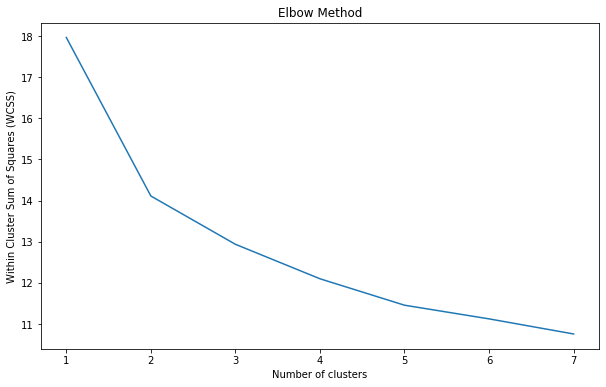

In [25]:
## Define our Dataset
X = Nghbr_grp.drop(['City','Neighborhood','Latitude','Longitude'], axis = 1)

## Within-Cluster-Sum-of-Squares (WCSS)
wcss = []
for i in range(1, 8):
    #kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (10,6))
plt.plot(range(1, 8),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.show()

<li Style='font-size:110%;color:brown'> 
     Finally, I cluster all the neighborhood based on their venues category using <em>k</em>-means into 5 clusters. </li>

In [26]:
# set number of clusters
kclusters = 5

Nghbr_clustering = Nghbr_grp.drop(['City','Neighborhood','Latitude','Longitude'], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Nghbr_clustering)

## View cluster output
#print('Neighborhood Labeled:',len(kmeans.labels_[0:])) # check # of cluster labels generated for each row
#print('Cluster dataframe output:')
#Nghbr_clustering.head()

## Add clustering labels
Nghbr_Final.insert(0, 'Cluster Labels', kmeans.labels_)

## view final output
print('Final Cluster dataframe')
Nghbr_Final.head() 

Final Cluster dataframe


,Cluster Labels,City,Neighborhood,Latitude,Longitude,1st Most Common Vcat,2nd Most Common Vcat,3rd Most Common Vcat,4th Most Common Vcat,5th Most Common Vcat,6th Most Common Vcat,7th Most Common Vcat,8th Most Common Vcat,9th Most Common Vcat,10th Most Common Vcat
0,4,New York,Allerton,40.865788,-73.859319,Pizza Place,Supermarket,Bus Station,Deli / Bodega,Breakfast Spot,Dessert Shop,Bakery,Chinese Restaurant,Gym / Fitness Center,Gas Station
1,1,New York,Arden Heights,40.549286,-74.185887,Pizza Place,Deli / Bodega,Pharmacy,Coffee Shop,Dry Cleaner,Fish & Chips Shop,Financial or Legal Service,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant
2,4,New York,Battery Park City,40.711932,-74.016869,Park,Hotel,Coffee Shop,Gym,Memorial Site,Food Court,Boat or Ferry,Burger Joint,Gourmet Shop,Plaza
3,4,New York,Bayside,40.766041,-73.774274,Bar,Pizza Place,Indian Restaurant,American Restaurant,Sushi Restaurant,Cosmetics Shop,Greek Restaurant,Steakhouse,Spa,Italian Restaurant
4,1,New York,Bedford Stuyvesant,40.687232,-73.941785,Coffee Shop,Café,Deli / Bodega,Bar,Pizza Place,Fried Chicken Joint,Bus Stop,Gift Shop,Gourmet Shop,Juice Bar


<li Style='font-size:110%;color:brown'> How the clustering have classified similar neighborhoods across city ?

In [27]:
# View Goupby 
Nghbr_Final.groupby(['Cluster Labels','City']).count()[['Neighborhood']]

Neighborhood
Cluster Labels City                  
0              New York            10
               Toronto              1
1              New York             8
               Toronto             19
2              New York             2
               Toronto              3
3              New York             2
               Toronto              8
4              New York            39
               Toronto             13

*We can see that each cluster has one or more neighbourhoods from both the city, which suggest that in our dataset we have match for every neigborhood in both the city.*

**Examine Clusters**

*Now, I can examine cluster assigned to Neighborhood and determine the discriminating venue categories that distinguish it from other cluster and I can also find similar neighborhood by cluster label. Taking few rows of cluster # 4 in order to examine it.*

In [28]:
Col = Nghbr_Final.columns[[1,2] + list(range(5, Nghbr_Final.shape[1]))]
sub = Nghbr_Final[Nghbr_Final['Cluster Labels'] == 4].index
Nghbr_Final.loc[sub,Col][-15:].sort_values(by=['1st Most Common Vcat'])

,City,Neighborhood,1st Most Common Vcat,2nd Most Common Vcat,3rd Most Common Vcat,4th Most Common Vcat,5th Most Common Vcat,6th Most Common Vcat,7th Most Common Vcat,8th Most Common Vcat,9th Most Common Vcat,10th Most Common Vcat
76,Toronto,"Golden Mile, Clairlea, Oakridge",Bakery,Bus Line,Ice Cream Shop,Park,Metro Station,Yoga Studio,Eye Doctor,Egyptian Restaurant,Electronics Store,Empanada Restaurant
56,New York,Starrett City,Bus Station,Supermarket,Pharmacy,Pizza Place,American Restaurant,Donut Shop,Bus Stop,Caribbean Restaurant,Convenience Store,English Restaurant
80,Toronto,"Kennedy Park, Ionview, East Birchmount Park",Discount Store,Convenience Store,Department Store,Bus Station,Train Station,Coffee Shop,Hobby Shop,Chinese Restaurant,Cycle Studio,Cosmetics Shop
90,Toronto,"Steeles West, L'Amoreaux West",Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Grocery Store,Sandwich Place,Pharmacy,Coffee Shop,Pizza Place,Bank,Supermarket
68,Toronto,Davisville North,Food & Drink Shop,Hotel,Gym / Fitness Center,Park,Sandwich Place,Department Store,Gym,Breakfast Spot,Filipino Restaurant,Entertainment Service
66,Toronto,Christie,Grocery Store,Café,Park,Restaurant,Candy Store,Coffee Shop,Diner,Baby Store,Italian Restaurant,Nightclub
69,Toronto,"Dorset Park, Wexford Heights, Scarborough Town...",Indian Restaurant,Chinese Restaurant,Brewery,Pet Store,Furniture / Home Store,Vietnamese Restaurant,Exhibit,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
95,Toronto,Thorncliffe Park,Indian Restaurant,Sandwich Place,Yoga Studio,Supermarket,Coffee Shop,Discount Store,Pharmacy,Middle Eastern Restaurant,Gas Station,Restaurant
75,Toronto,Glencairn,Metro Station,Pub,Japanese Restaurant,Asian Restaurant,Yoga Studio,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant
57,New York,Stuyvesant Town,Park,Gas Station,Bistro,Bar,Gym / Fitness Center,Skating Rink,Pet Service,Harbor / Marina,Cocktail Bar,Coffee Shop


*We can see from above results that one of Toronto the neighborhood **Thorncliffe Park** has match with few of the neighborhood in New York. I tried to find out more about other match of this neighborhood with in Toronto and in New York.*

<li Style='font-size:110%;color:brown'>
    Match of <em>"Thorncliffe Park"</em> neighborhood within Toronto city. </li>

In [29]:
# filter cluster 4 data within Toronto
sub = Nghbr_Final.loc[(Nghbr_Final['Cluster Labels'] == 4) & (Nghbr_Final['City'] == 'Toronto')].index
Nghbr_Final.loc[sub,Col].sort_values(by=['1st Most Common Vcat'])

,City,Neighborhood,1st Most Common Vcat,2nd Most Common Vcat,3rd Most Common Vcat,4th Most Common Vcat,5th Most Common Vcat,6th Most Common Vcat,7th Most Common Vcat,8th Most Common Vcat,9th Most Common Vcat,10th Most Common Vcat
76,Toronto,"Golden Mile, Clairlea, Oakridge",Bakery,Bus Line,Ice Cream Shop,Park,Metro Station,Yoga Studio,Eye Doctor,Egyptian Restaurant,Electronics Store,Empanada Restaurant
80,Toronto,"Kennedy Park, Ionview, East Birchmount Park",Discount Store,Convenience Store,Department Store,Bus Station,Train Station,Coffee Shop,Hobby Shop,Chinese Restaurant,Cycle Studio,Cosmetics Shop
90,Toronto,"Steeles West, L'Amoreaux West",Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Grocery Store,Sandwich Place,Pharmacy,Coffee Shop,Pizza Place,Bank,Supermarket
68,Toronto,Davisville North,Food & Drink Shop,Hotel,Gym / Fitness Center,Park,Sandwich Place,Department Store,Gym,Breakfast Spot,Filipino Restaurant,Entertainment Service
66,Toronto,Christie,Grocery Store,Café,Park,Restaurant,Candy Store,Coffee Shop,Diner,Baby Store,Italian Restaurant,Nightclub
69,Toronto,"Dorset Park, Wexford Heights, Scarborough Town...",Indian Restaurant,Chinese Restaurant,Brewery,Pet Store,Furniture / Home Store,Vietnamese Restaurant,Exhibit,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
95,Toronto,Thorncliffe Park,Indian Restaurant,Sandwich Place,Yoga Studio,Supermarket,Coffee Shop,Discount Store,Pharmacy,Middle Eastern Restaurant,Gas Station,Restaurant
75,Toronto,Glencairn,Metro Station,Pub,Japanese Restaurant,Asian Restaurant,Yoga Studio,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant
70,Toronto,Downsview,Park,Airport,Electronics Store,Snack Place,Yoga Studio,Eye Doctor,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant
78,Toronto,Humewood-Cedarvale,Park,Trail,Field,Hockey Arena,Yoga Studio,Exhibit,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store


*I found 12 match for neighborhood within Toronto, Next I checked for neighborhood match in New York.*

<li Style='font-size:110%;color:brown'>
    Match for one of the Toronoto neighborhood named <em> "Thorncliffe Park" </em> in New York city. </li>

In [30]:
# filter cluster 4 data in Newyork
sub = Nghbr_Final.loc[(Nghbr_Final['Cluster Labels'] == 4) & (Nghbr_Final['City'] == 'New York')].index
Nghbr_Final.loc[sub,Col].sort_values(by=['1st Most Common Vcat'])

,City,Neighborhood,1st Most Common Vcat,2nd Most Common Vcat,3rd Most Common Vcat,4th Most Common Vcat,5th Most Common Vcat,6th Most Common Vcat,7th Most Common Vcat,8th Most Common Vcat,9th Most Common Vcat,10th Most Common Vcat
25,New York,Greenridge,Bagel Shop,Diner,Shipping Store,Lawyer,Asian Restaurant,Pizza Place,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
17,New York,Dyker Heights,Bagel Shop,Park,Grocery Store,Golf Course,Burger Joint,Eye Doctor,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant
28,New York,Hollis,Bakery,Park,Mobile Phone Shop,Baseball Field,Chinese Restaurant,Shopping Mall,Electronics Store,Sandwich Place,Asian Restaurant,Discount Store
30,New York,Huguenot,Bank,Ice Cream Shop,Deli / Bodega,Bridal Shop,Nail Salon,Donut Shop,Sandwich Place,Train Station,Asian Restaurant,Moving Target
3,New York,Bayside,Bar,Pizza Place,Indian Restaurant,American Restaurant,Sushi Restaurant,Cosmetics Shop,Greek Restaurant,Steakhouse,Spa,Italian Restaurant
56,New York,Starrett City,Bus Station,Supermarket,Pharmacy,Pizza Place,American Restaurant,Donut Shop,Bus Stop,Caribbean Restaurant,Convenience Store,English Restaurant
44,New York,Pomonok,Bus Station,Supermarket,Bar,Pizza Place,Halal Restaurant,Japanese Restaurant,Scenic Lookout,Playground,Park,Bowling Alley
12,New York,Claremont Village,Bus Station,Grocery Store,Bakery,Park,Deli / Bodega,Gym,Liquor Store,Chinese Restaurant,Caribbean Restaurant,Gift Shop
42,New York,Park Hill,Bus Stop,Gym / Fitness Center,Park,Hotel,Athletics & Sports,Coffee Shop,Exhibit,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
39,New York,New Brighton,Bus Stop,Park,Deli / Bodega,Playground,Discount Store,Bowling Alley,Bridal Shop,Botanical Garden,Fish Market,Eye Doctor


*I found 38 match for neighborhood in New York., like wise we can explore, compare and find similar neighborhoods with in and across cities. Let's visualize the "Thorncliffe Park" neighborhood match for New York*

**Neighborhood match of Thorncliffe Park, Toronto in New York City**

In [31]:
## Filter out all Restaurants and create Datframe 
sub = Nghbr_Final.loc[(Nghbr_Final['Cluster Labels'] == 4) & (Nghbr_Final['City'] == 'New York')].index 
columns = ['City','Neighborhood','Latitude','Longitude']
df = Nghbr_Final.loc[sub,:][columns]

## Get Coordinates of Toranto city 
address = 'New York City, NY'
geolocator = Nominatim(user_agent="Venue_explorer")
location = geolocator.geocode(address); latitude = location.latitude; longitude = location.longitude

## Create Map 
# let's start with a clean copy of the map of New York
df_map = folium.Map(location = [latitude,longitude], zoom_start = 10)

# loop to add each data point to the mark cluster
for lat, lng, Neighborhood, in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    folium.features.CircleMarker(
        location=[lat, lng],
        radius=5, # define the circle markers size
        color='blue',
        fill=True,
        popup= folium.Popup('{}'.format(Neighborhood), parse_html = True),
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html = False).add_to(df_map)
#print('Neighborhood match of Thorncliffe Park, Toronton(Cluster#4) in New York City\n')
df_map.save("Match of Thorncliffe Park in NY.html")
df_map # display map

*Above map shows New York neighborhoods spread through out city, which are like the one of our selected neighborhood (from cluster # 4) of Toronto. in same manner we can compare the likelihood of neighborhoods.*

*Finally, I will plot cluster to see how the neighborhoods cluster are spread within city. let's visualize the clustering of Neighborhood for New York City.*

**Map of Neighborhood cluster for New York City**

In [32]:
## create map

## get data for New York
df = Nghbr_Final[Nghbr_Final['City']=='New York']

## Get Coordinates of Toranto city 
address = 'New York City, NY'
geolocator = Nominatim(user_agent="Newyork_explorer")
location = geolocator.geocode(address); latitude = location.latitude; longitude = location.longitude

## let's start again with a clean copy of the map
#print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude),'\n')

Ny_map = folium.Map(location = [latitude, longitude], zoom_start = 10)
pcolors = ['yellow', 'green', 'red', 'orange', 'darkbrown','blue']

# loop to add each data point to the mark cluster
for lat, lng, poi, cluster in zip(df['Latitude'], df['Longitude'],df['Neighborhood'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=(label),
        color=pcolors[cluster+1],
        fill=True,
        fill_color=pcolors[0],
        fill_opacity=0.7).add_to(Ny_map)
Ny_map.save("Map of Neighborhood cluster for New York City.html")
Ny_map # display map


*Above map gives idea how the chosen cluster # 4 (marked with blue circle) differs from other cluster in our dataset. although every neighborhood has the few venues of our choice yet some are very distinct due to its proximity to specific venues near by such as having beach (marked with green circle, cluster # 0). lets query cluster # 0 to validate the same.*

In [33]:
print('Neighborhood data for cluster # 0 ')
sub = Nghbr_Final.loc[(Nghbr_Final['Cluster Labels'] == 0)].index
Nghbr_Final.loc[sub,Col].sort_values(by=['1st Most Common Vcat'])


Neighborhood data for cluster # 0 


,City,Neighborhood,1st Most Common Vcat,2nd Most Common Vcat,3rd Most Common Vcat,4th Most Common Vcat,5th Most Common Vcat,6th Most Common Vcat,7th Most Common Vcat,8th Most Common Vcat,9th Most Common Vcat,10th Most Common Vcat
6,New York,Belle Harbor,Beach,Pub,Deli / Bodega,Spa,Boutique,Mexican Restaurant,Bakery,Chinese Restaurant,Donut Shop,Pharmacy
8,New York,Breezy Point,Beach,Bus Stop,Supermarket,Monument / Landmark,Trail,Yoga Studio,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service
26,New York,Hammels,Beach,Diner,Fast Food Restaurant,Dog Run,Shoe Store,Bus Stop,Bus Station,Deli / Bodega,Gym / Fitness Center,Fried Chicken Joint
38,New York,Neponsit,Beach,Beach Bar,Yoga Studio,Factory,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant
48,New York,Rockaway Beach,Beach,Food Truck,Deli / Bodega,Bagel Shop,Seafood Restaurant,Arepa Restaurant,Latin American Restaurant,BBQ Joint,Ice Cream Shop,Pizza Place
49,New York,Rockaway Park,Beach,Donut Shop,Pizza Place,Ice Cream Shop,Pharmacy,Seafood Restaurant,Liquor Store,Bar,Bank,Bagel Shop
53,New York,South Beach,Beach,Deli / Bodega,Pier,Athletics & Sports,Yoga Studio,Eye Doctor,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant
36,New York,Midland Beach,Bus Stop,Beach,Russian Restaurant,Liquor Store,Bookstore,Deli / Bodega,Restaurant,Pet Store,Ethiopian Restaurant,Event Space
93,Toronto,The Beaches,Pub,Trail,Health Food Store,Beach,Yoga Studio,Exhibit,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
51,New York,Sea Gate,Spa,Beach,Home Service,Bus Station,American Restaurant,Exhibit,Event Space,Event Service,Yoga Studio,Factory


*As expected neighborhood in cluster # 0 are the one which have beach nearby and that specific venue sets them apart from neighborhoods of other clusters, also we can observe a match of similar neighborhood in Toronto which shares a same cluster label. i.e. (#93: The Beaches, Toronto)*

<a name='results'></a>   
<h2 style='text-align:left'> 5. Results and Discussion: </h2>

*After collecting location data for all neighborhoods of both the city, We got a list of  15 boroughs and 401 neighborhoods. which consist 302 of New York and 99 neighborhoods of Toronto. as we know New York is bigger than Toronto in area and the count of neighborhood apparently suggest that it is much more dense, further search on web suggest that its because of huge difference in population of both the cities.*    

- __Toronto__ : Area: 630.2 km², Population: 29.3 lakhs
- __NewYork__ : Area: 783.8 km², Population: 84 lakhs

*However, as our objective is to analyze the kind of neighborhoods (based on venues categories) that both the city has to offer , I fetched the venues with in 500 meter radius of each neighborhood from Foursquare API and cleaned them, I obtained total **11,975 venues**, which includes duplicates of ~900 venues which are with in radius of more then neighborhood, I further explored the data and transformed it in standard format for analysis.*

*__Unique counts after cleaning:__*

- __Toronto : Neighborhoods: 95   Venues: 9,422  Categories: 428__
- __NewYork : Neighborhoods: 301  Venues: 1,639  Categories: 264__ 

__Comparison of Cities based on Venue Categories:__

*Given that New York has way too more venues compare to Toronto, and has more  venue categories. To see how the venue categories are distributed. I mapped venue categories to more general category and compared the contribution of general venue categories of both the cities.*

* *We found that these cities are very similar and has almost identical contribution of venue categories.  The majority of venues falls in to top 2 categories which contributes to ~75% of venues, where ~52% venues falls in to Food and ~23% into Shop & Services category for both the cities.*

* *We then plotted distribution of restaurants by cuisine they serve, and concluded that both cities have restaurants serving cuisines famous across the globe. We also created a map of venues for Indian restaurants for both the cities which showed us that Indian restaurants spread across city and not concentrated around any single neighborhood.* 

__Comparison of Neighborhood based on top 10 Venue Categories:__

*For Neighborhood comparison analysis I took a subset of neighborhood from both the cities, having at least one top venue in below mentioned categories, I found 105 neighborhood, 61 of New York and 44 of Toronto, and classified them in 5 cluster using K-Means based on their top venue categories.* 

>*Filtered neighborhood having any of the following category : Gym, Park, Arts & Entertainment, Beach, Coffee Shop, Sports Bar, Market, Supermarket, Asian Restaurant, Indian Restaurant.*

* *We found that each cluster has mix of neighborhoods from both the city, and non of the cluster found city specific, which suggest that in our dataset we have match for every neighborhood in both the city.*

* *We took one neighborhood to find match within city as well as in other city and explored them with the help of map and concluded that with this framework we can find and compare neighborhoods*

* *Finally, we plotted neighborhood cluster on map for New York, and examined how the neighborhoods cluster are spread within city and how they differs from other cluster. we took a closure look to one cluster and concluded that although every neighborhood has the few venues of our choice yet some are very distinct due to its proximity to specific venues near by such as having beach and as such sets them apart from neighborhoods of other clusters.*

<a name='conclusion'></a>   
<h2 style='text-align:left'> 6. Conclusion: </h2>

*The purpose of this project was to compare Toronto, Canada and New York city of America, and check likelihood of cities and their neighborhoods by kind of venues they offer and workout the process of comparison of cities and neighborhoods across geographies. Venues and their details for all the neighborhood have been identified and City and Neighborhood level Exploratory Data Analysis are complete. The results suggest that despite of being on two different geographies and of different size of cities. Both the cities, New York and Toronto shares similar contribution venue types, and has many similar kind of neighborhood which one can choose based on individual interest. we have our framework ready and cleaned/labeled data which we can use any time to query the neighborhood or venues of our choice for both the cities, we can also use this data to suggest neighborhoods to the new person/business to these cities.

<p style='text-align:center'> End of Notebook</p>   

---